In [1]:
import os
import sys

import numpy as np
import csv
from math import floor

In [2]:
#import asi as asi

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
from numpy import sin, cos, tan, sqrt, pi, exp, abs

from flatspin import CustomSpinIce,SquareSpinIceClosed

In [3]:
import numpy as np
import flatspin.model
from flatspin.encoder import *
from flatspin.model import *
def encode_inp_as_field(input_signal,constantEncoder):
    encode = constantEncoder
    # print("Input Signal", input_signal)
    # h_input = self.Hc+self.Hr*input_signal
    # encode_h_input = {'H0': self.Hc, 'H':h_input}
    input_signal = input_signal
    # print('Input Signal', input_signal)
    h_ext = encode(input_signal) # encode input signal as external magnetic field
    # print("H Ext", h_ext)
    return h_ext

def encode_inp_as_field_cycle(input_signal,constantEncoder, N=5):
    encode = constantEncoder
    # print("Input Signal", input_signal)
    # h_input = self.Hc+self.Hr*input_signal
    # encode_h_input = {'H0': self.Hc, 'H':h_input}
    input_signal = input_signal
    # print('Input Signal', input_signal)
    h_ext = encode(input_signal) # encode input signal as external magnetic field
    cycled_h_ext = []
    for num in h_ext:
        for i in range(1, N+1):
            cycled_h_ext.append(num)
            cycled_h_ext.append(-num)
    return cycled_h_ext

Text(0.5, 0, 'H (mT)')

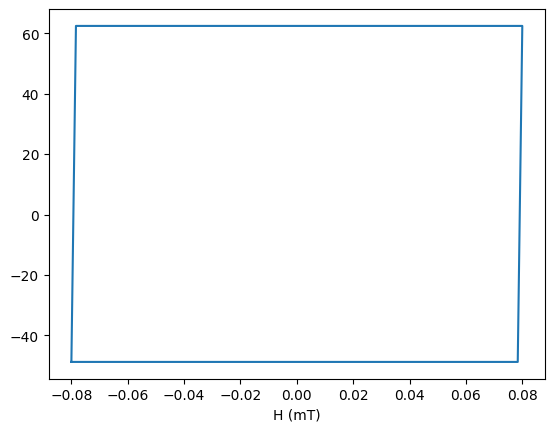

In [4]:
from flatspin.encoder import Constant
timesteps = 1
encoder_type = "Constant"
phi0=7; phi = 97
H0 = 55e-3; H = 80e-3
test_encoder = Constant(H0=0,H=H,phi=7, timesteps=timesteps)

size = (7,7); hc = 200e-3; sw_b = 0.41; sw_c = 1; sw_beta = 1.5; alpha =  3e-5; sw_gamma = 3.9; disorder = 0.05; use_cuda = 1; ndist=1
h_set=np.linspace(-1, 1, 100)
h_set = np.concatenate([h_set, -h_set])
model = SquareSpinIceClosed(size=(7,7), use_cuda=True)
model.set_alpha(alpha)
model.set_neighbor_distance(ndist)
model.set_temperature(0)
#model.randomize()
h_ext_set=test_encoder(h_set)
h_dir=-h_ext_set[0]/H
M_H = []
for h_ext in h_ext_set:
    model.set_h_ext(h_ext)
    model.relax()
    m = model.total_magnetization().dot(h_dir)
    M_H.append(m)
plt.plot(H*h_set, M_H)
plt.xlabel("H (mT)")
#plt.xlim([0.078,0.082])


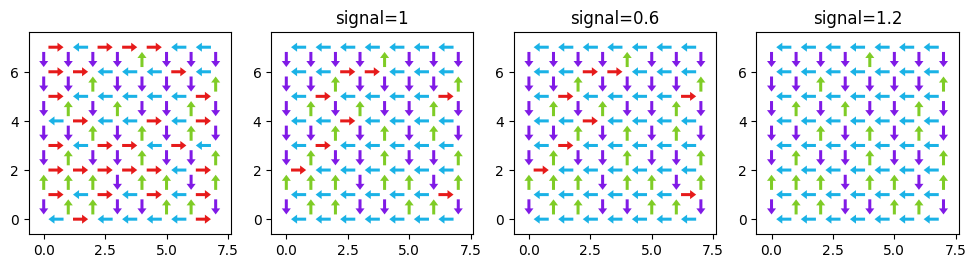

In [5]:
H0 = 55e-3; H = 80e-3
encoder=Constant(H0=H0,H=H,phi=7, timesteps=timesteps)
my_signal=[1,0.6,1.2]
h_ext_set=encode_inp_as_field_cycle(my_signal,encoder, N=5)
fig1, ax1 = plt.subplots(1,4,figsize=(12,5))
size = (7,7); hc = 200e-3; sw_b = 0.41; sw_c = 1; sw_beta = 1.5; alpha =  3e-5; sw_gamma = 3.9; disorder = 0.05; use_cuda = 1; ndist=1
model = SquareSpinIceClosed(size=(7,7), use_cuda=True)
model.set_alpha(alpha)
model.set_neighbor_distance(ndist)
model.set_temperature(0)
flip_set=2*np.random.randint(2, size= len(model.spin))-1
    #print(np.mean((tp_asi.spin)[0:5]),np.mean((tp_asi.spin)[10:20]))
for ff in range(len(flip_set)):
    model.spin[ff]=flip_set[ff]
model.plot(ax=ax1[0])
my_list=[-1,9,19,29]
for ii in range(len(h_ext_set)):
    model.set_h_ext(h_ext_set[ii])
    model.relax()
    if ii in my_list:
        model.plot(ax=ax1[my_list.index(ii)])
        ax1[my_list.index(ii)].set_title("signal=%a" % (my_signal[my_list.index(ii)-1]))
plt.show()


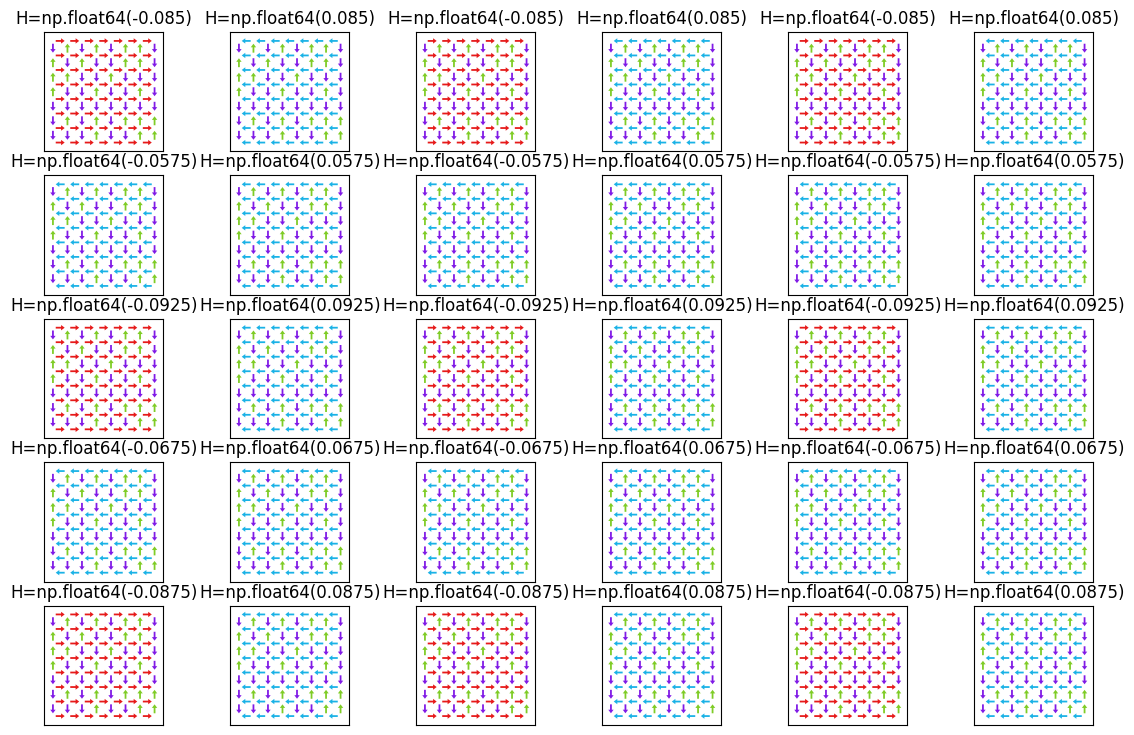

In [6]:
H0 = 55e-3; H = 80e-3
encoder=Constant(H0=H0,H=H,phi=7, timesteps=timesteps)
my_signal=[1.2,0.1,1.5,0.5,1.3]
nc=3
h_ext_set=encode_inp_as_field_cycle(my_signal,encoder, N=nc)
h_dir=-h_ext_set[0]/np.linalg.norm(h_ext_set[0])
fig1, ax1 = plt.subplots(len(my_signal),2*nc,figsize=(14,9))
size = (7,7); hc = 200e-3; sw_b = 0.41; sw_c = 1; sw_beta = 1.5; alpha =  3e-5; sw_gamma = 3.9; disorder = 0.05; use_cuda = 1; ndist=1
model = SquareSpinIceClosed(size=(7,7), use_cuda=True)
model.set_alpha(alpha)
model.set_neighbor_distance(ndist)
model.set_temperature(0)
flip_set=2*np.random.randint(2, size= len(model.spin))-1
    #print(np.mean((tp_asi.spin)[0:5]),np.mean((tp_asi.spin)[10:20]))
for ff in range(len(flip_set)):
    model.spin[ff]=flip_set[ff]
#model.plot(ax=ax1[0])
for ii in range(len(h_ext_set)):
    yy=int(ii/(2*nc)); xx=ii%(2*nc)
    model.set_h_ext(h_ext_set[ii])
    model.relax()
    model.plot(ax=ax1[yy][xx])
    ax1[yy][xx].set_title("H=%a" % np.round(((h_ext_set[ii])@h_dir),5))
    ax1[yy][xx].set_xticks([]); ax1[yy][xx].set_yticks([])
plt.show()


In [7]:
int(np.floor(5/2))

2

In [8]:
encoder(1.1)

array([[0.08188506, 0.01005422]])

In [9]:
# @title benchmark data
import numpy as np
import csv
from math import floor

def NARMA10(N):
    """ Calculate an N-long Narma10 sequence """

    while True:
        # generate input
        u = 0.5 * np.random.uniform(low=0.0, high=1.0, size=(N + 1000))

        # generate output arrays
        y_base = np.zeros(shape=(N + 1000))

        # calculate intermediate output
        for i in range(10, N + 1000):
            # implementation of a tenth order system model
            y_base[i] = 0.3 * y_base[i - 1] + 0.05 * y_base[i - 1] * \
                        np.sum(y_base[i - 10:i]) + 1.5 * u[i - 1] * u[i - 10] + 0.1

        if np.isfinite(y_base).all():
            return u[1000:], y_base[1000:]

        # otherwise, try again. You random numbers were unlucky
        else:
            print('Retry...')

def NARMA7(N):
    """ Calculate an N-long Narma7 sequence """
    while True:
        # generate input
        u = 0.5 * np.random.uniform(low=0.0, high=1.0, size=(N + 1000))
        # from the paper u is mackey glass signal
        # u = u_data
        # generate output arrays
        y_base = np.zeros(shape=(N + 1000))

        # calculate intermediate output
        for i in range(7, N + 1000):
            # implementation of a tenth order system model
            y_base[i] = 0.3 * y_base[i - 1] + 0.05 * y_base[i - 1] * \
                        np.sum(y_base[i - 6:i]) + 1.5 * u[i - 1] * u[i - 6] + 0.1

        if np.isfinite(y_base).all():
            return u[1000:], y_base[1000:]

        # otherwise, try again. You random numbers were unlucky
        else:
            print('Retry...')

def NARMA7_MC(N, pred_time_step=8 ):
    """ Calculate an N-long Narma7 sequence """
    while True:
        # generate input
        seed=1
        np.random.seed(1)
        u = 0.5 * np.random.uniform(low=0.0, high=1.0, size=(N + 1000))
        # from the paper u is mackey glass signal
        # u = u_data
        # generate output arrays
        y_base = np.zeros(shape=(N + 1000))

        # calculate intermediate output
        for i in range(7, N + 1000):
            # implementation of a tenth order system model
            y_base[i] = 0.3 * y_base[i - 1] + 0.05 * y_base[i - 1] * \
                        np.sum(y_base[i - 6:i]) + 1.5 * u[i - 1] * u[i - 6] + 0.1
        Ly=len(y_base)
        if np.isfinite(y_base).all():
            u_set=[]; y_set=[]
            for k in range(pred_time_step):
                u_set+=[u[1000-k:Ly-k]]
                y_set+=[y_base[1000:Ly]]
            return u_set, y_set

        # otherwise, try again. You random numbers were unlucky
        else:
            print('Retry...')



def Df(x):
    a=0.2
    y=a*x/(1+x**10)
    return y

def MackeyGlass(N, tau, pred_time_step=1 ,time_interval=1):
    x = np.zeros((N,))
    t = np.zeros((N,))
    pred_time_step = pred_time_step
    b=0.1
    h = time_interval
    x[0] = 1.2
    for k in range(N-1):
        t[k+1] = t[k]+h
        if k < tau:
            k1 = -b*x[k]
            k2 = -b*(x[k]+h*k1/2);
            k3 = -b*(x[k]+k2*h/2);
            k4 = -b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
        else:
            n = floor((t[k]-tau-t[0])/h+1);
            k1 = Df(x[n])-b*x[k];
            k2 = Df(x[n])-b*(x[k]+h*k1/2);
            k3 = Df(x[n])-b*(x[k]+2*k2*h/2);
            k4 = Df(x[n])-b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
    y = x[2000+pred_time_step:5000+pred_time_step]
    u = x[2000:5000]
    return y,u

def MackeyGlassMC(N, tau, pred_time_step=8 ,time_interval=1):
    x = np.zeros((N,))
    t = np.zeros((N,))
    pred_time_step = pred_time_step
    b=0.1
    h = time_interval
    x[0] = 1.2
    for k in range(N-1):
        t[k+1] = t[k]+h
        if k < tau:
            k1 = -b*x[k]
            k2 = -b*(x[k]+h*k1/2);
            k3 = -b*(x[k]+k2*h/2);
            k4 = -b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
        else:
            n = floor((t[k]-tau-t[0])/h+1);
            k1 = Df(x[n])-b*x[k];
            k2 = Df(x[n])-b*(x[k]+h*k1/2);
            k3 = Df(x[n])-b*(x[k]+2*k2*h/2);
            k4 = Df(x[n])-b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
    y = x[2000-pred_time_step:5000-pred_time_step]
    u = x[2000:5000]
    return y,u

def MackeyGlassNL(N, tau, pred_time_step=8 ,time_interval=1):
    x = np.zeros((N,))
    t = np.zeros((N,))
    pred_time_step = pred_time_step
    b=0.1
    h = time_interval
    x[0] = 1.2
    for k in range(N-1):
        t[k+1] = t[k]+h
        if k < tau:
            k1 = -b*x[k]
            k2 = -b*(x[k]+h*k1/2);
            k3 = -b*(x[k]+k2*h/2);
            k4 = -b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
        else:
            n = floor((t[k]-tau-t[0])/h+1);
            k1 = Df(x[n])-b*x[k];
            k2 = Df(x[n])-b*(x[k]+h*k1/2);
            k3 = Df(x[n])-b*(x[k]+2*k2*h/2);
            k4 = Df(x[n])-b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
    u = x[2000-pred_time_step:5000-pred_time_step]
    y = x[2000:5000]
    return y,u

def MackeyGlass_predict(N, tau, pred_time_step=8 ,time_interval=1):
    x = np.zeros((N,))
    t = np.zeros((N,))
    pred_time_step = pred_time_step
    b=0.1
    h = time_interval
    x[0] = 1.2
    for k in range(N-1):
        t[k+1] = t[k]+h
        if k < tau:
            k1 = -b*x[k]
            k2 = -b*(x[k]+h*k1/2);
            k3 = -b*(x[k]+k2*h/2);
            k4 = -b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
        else:
            n = floor((t[k]-tau-t[0])/h+1);
            k1 = Df(x[n])-b*x[k];
            k2 = Df(x[n])-b*(x[k]+h*k1/2);
            k3 = Df(x[n])-b*(x[k]+2*k2*h/2);
            k4 = Df(x[n])-b*(x[k]+k3*h);
            x[k+1] = x[k]+(k1+2*k2+2*k3+k4)*h/6;
    u_set=[]; y_set=[]
    for k in range(-pred_time_step,pred_time_step+2):
        u = x[2000-pred_time_step:5000-pred_time_step]
        y = x[2000+k:5000+k]
        u_set+=[u]; y_set+=[y]
    return u_set, y_set



def parity_checker(N, t_delay):
    x = np.random.randint(2, size= (N+t_delay))
    y = [sum(x[i-t_delay:i])%2 for i in range(t_delay,len(x))]
    u = x[t_delay:]
    # assert y_train[0] == sum(s[0:self.tDelay])%2
    return y, u

def short_term_memory(N, t_delay):
    x = np.random.randint(2, size= (1000+N+t_delay))
    y = x[1000-t_delay:1000+N+t_delay]
    u = x[1000:1000+N]
    return y, u

def generate_dataset(dataset_name, dataset_filename, pred_time_step=1):

    if dataset_name == 'MackeyGlass':
        y, u = MackeyGlass(6000, 17)
    if dataset_name == 'MackeyGlassMC':
        y, u = MackeyGlassMC(6000, 17, pred_time_step)

    if dataset_name == 'MackeyGlassNL':
        y, u = MackeyGlassNL(6000, 17, pred_time_step)


    if dataset_name == 'NARMA10':
        y, u = NARMA10(5000)

    if dataset_name == 'NARMA7':
        y, u = NARMA7(2000)

    if dataset_name == 'ParityChecker':
        y, u = parity_checker(1000, 10)

    if dataset_name == 'ShortTermMemory':
        y, u = short_term_memory(1000,10)

    data = list(zip(y, u))

    csv_file_path = dataset_filename+'.csv'

    with open(csv_file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['y', 'u'])
        csv_writer.writerows(data)

    print(f'Data has been successfully written to {csv_file_path}.')

# generate_dataset('NARMA7', 'narma7_5000_samples')
# generate_dataset('MackeyGlass', 'mackeyglass_1_3000_samples')
# generate_dataset('MackeyGlassMC', 'mackeyglassMC_1_3000_samples')
# generate_dataset('ParityChecker','partiy_checker_10_1000_samples')
# generate_dataset('ShortTermMemory','short_term_memory_10_1000_samples')

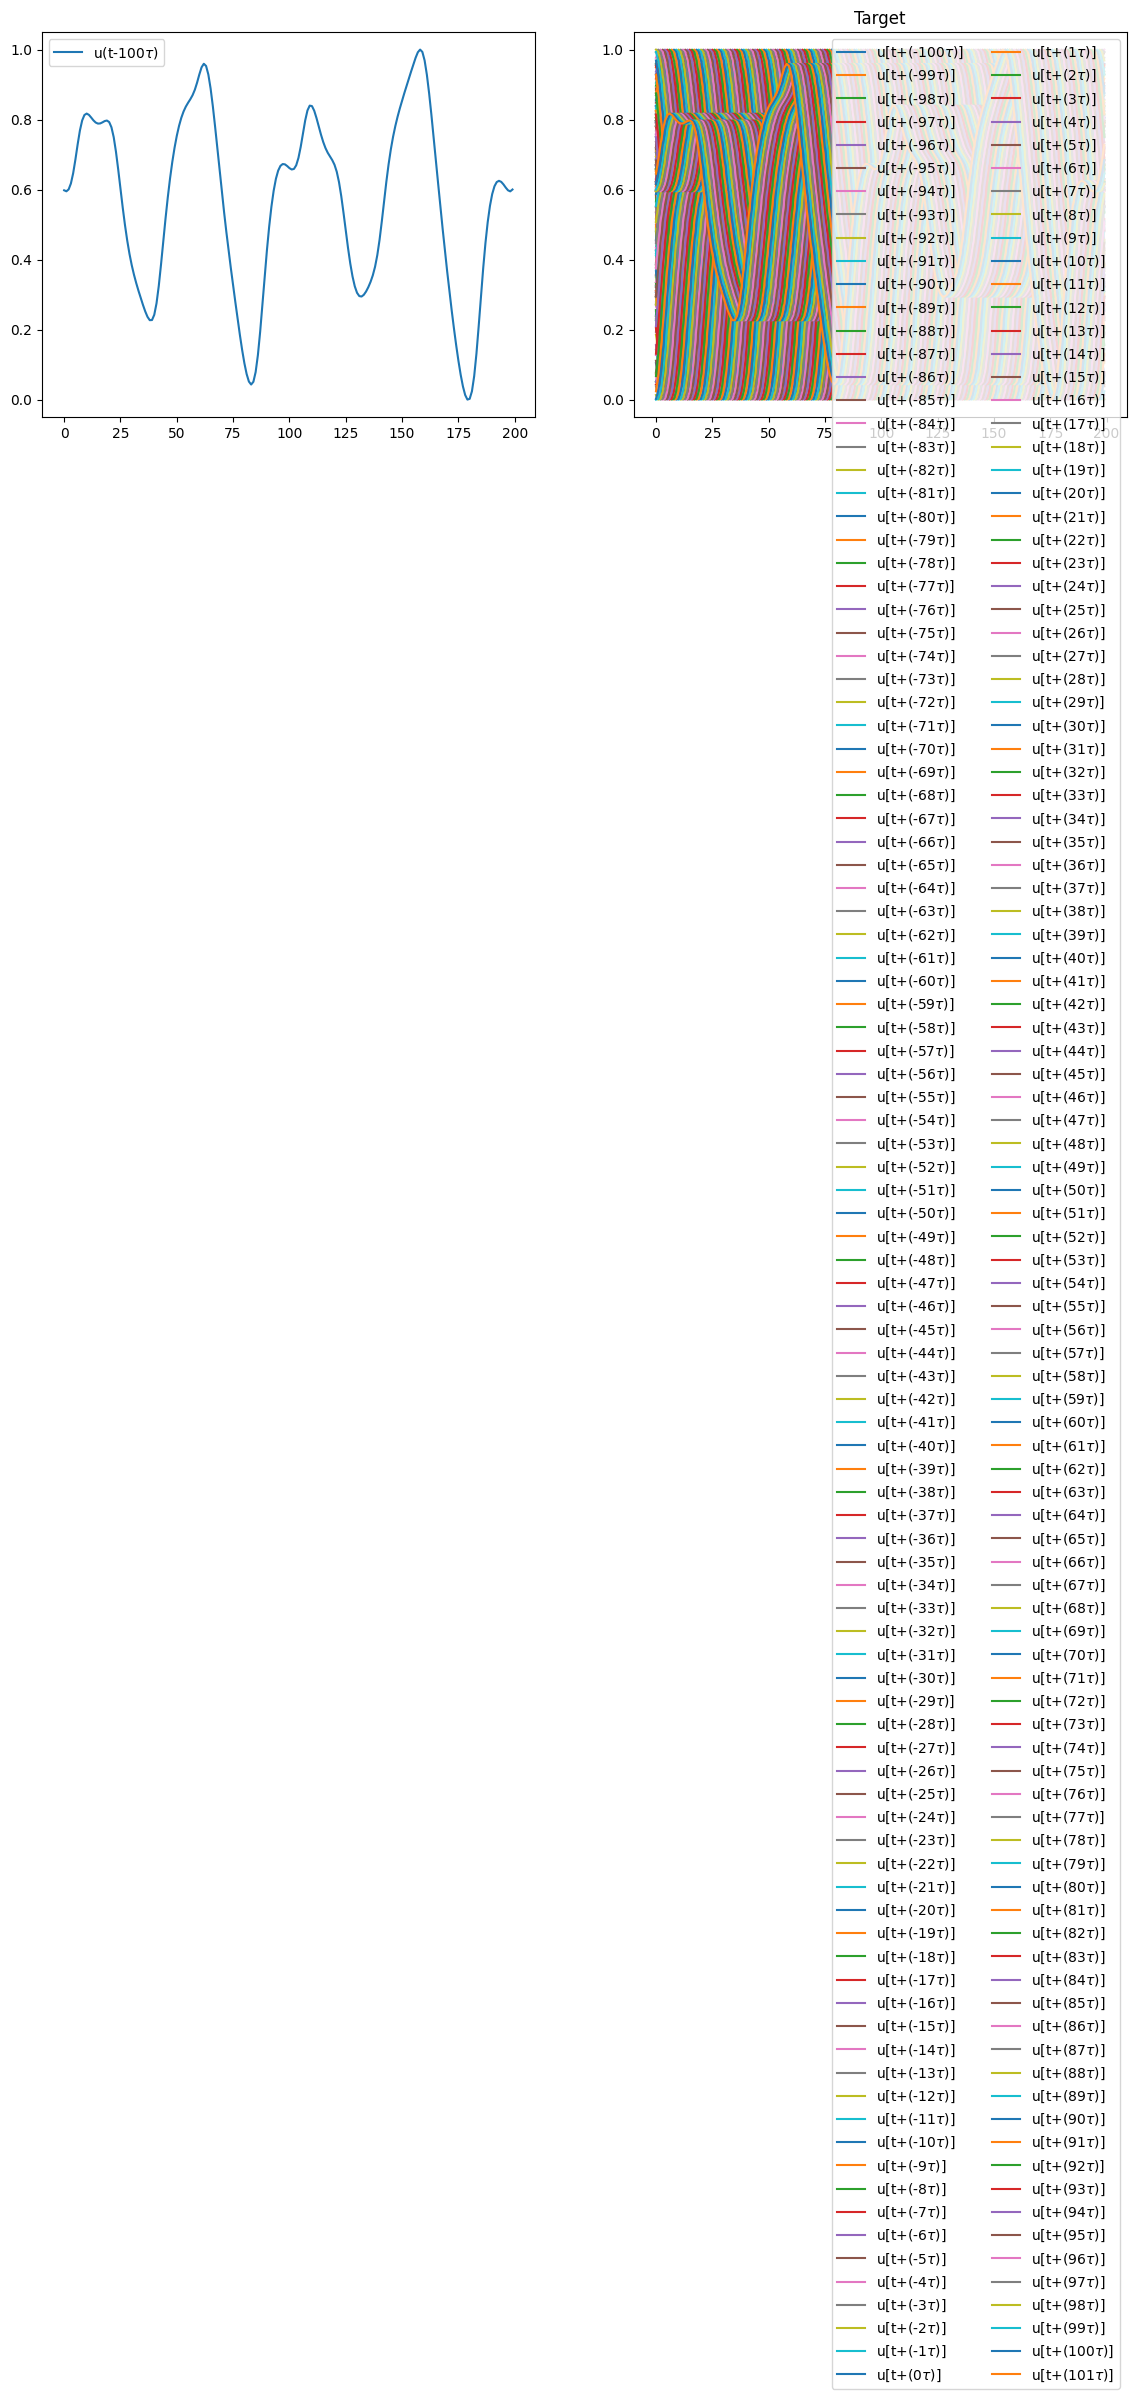

In [10]:
import matplotlib.pyplot as plt

prediction_steps = 100
benchmark_data=MackeyGlass_predict(6000, 17, prediction_steps)
u_set=benchmark_data[0]; y_set=benchmark_data[1]
u_norm_set=[]; y_norm_set=[]
fig, ax=plt.subplots(1,2,figsize=(14,5))

for k in range(len(u_set)):
    tp_u_norm=(u_set[k]-np.min(u_set[k]))/(np.max(u_set[k])-np.min(u_set[k]))
    tp_y_norm=(y_set[k]-np.min(y_set[k]))/(np.max(y_set[k])-np.min(y_set[k]))
    u_norm_set+=[tp_u_norm]
    y_norm_set+=[tp_y_norm]
    ax[1].plot(tp_y_norm[1350:1550], label="u[t+("+str(k-prediction_steps)+"$\\tau$)]")
ax[0].plot(tp_u_norm[1350:1550], label="u(t-"+str(prediction_steps)+"$\\tau$)")
#ax[1].plot(tp_u_norm[1000:1100], label="u[t+("+str(k-7)+"$\\tau$)]",linewidth=1,c='black')
ax[1].set_title("Target")
ax[0].legend(ncol=2); ax[1].legend(ncol=2)
plt.show()

In [11]:
print(len(y_set))

202


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

mix=0.15
class LinearLayer():
    def __init__(self, X, Y):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.X = torch.tensor(X).to(self.device)
        self.Y = torch.tensor(Y).to(self.device)

    def train(self, nodes, batch_size=256, ):
        train_ds = TensorDataset(self.X, self.Y)
        train_dl = DataLoader(train_ds, batch_size, shuffle=True)
        input_features = self.X.shape[1]  # The number of input features
        if len(self.Y.shape)==1:
            target_features = 1
        else:
            target_features = self.Y.shape[1] # The number of target features
        model = nn.Linear(input_features, target_features).to(self.device)
        opt = optim.SGD(model.parameters(), lr=1e-3) # Optimising Algorithm
        y_hat_before = model(self.X.float()).detach().cpu().numpy()
        y_hat_before = (y_hat_before - np.min(y_hat_before)) / (np.max(y_hat_before) - np.min(y_hat_before))  # Min-Max normalization

        # print('Y Hat Before Training ', y_hat_before)
        loss_fn = F.mse_loss # Loss Function

        self.trained_model = self.fit(1000, model, opt, train_dl, loss_fn)
        #print("Training completed")
        _Ybar = self.trained_model(self.X.float()).detach().cpu().numpy()
        #print('Predicted Y Hat After Training ')
        _Ybar = (_Ybar - np.min(_Ybar)) / (np.max(_Ybar) - np.min(_Ybar))  # Min-Max normalization
        _Y = self.Y.detach().cpu().numpy()
        MSE=np.mean(np.square(_Ybar.flatten()-_Y.flatten()))
        CC=np.corrcoef(_Ybar.flatten(), _Y.flatten())[0,1]
        return MSE, CC,  _Ybar

    #  Model training function
    def fit(self, num_epochs, model, opt, train_dl, loss_fn):
        # Initialize empty list to store losses
        losses = []
        for epoch in tqdm(range(num_epochs)):
          for xb, yb in train_dl:
            # Generate predictions
            pred = model(xb.float())
            ###
            y_pred=pred; y_true=yb.float()
            alpha=mix
            mse_loss = loss_fn(y_pred, y_true)
            y_pred_min = y_pred.view(-1).min(); y_pred_max = y_pred.view(-1).max()
            y_pred = (y_pred - y_pred_min) / (y_pred_max - y_pred_min + 1e-6)  # Add epsilon for numerical stability
            y_pred_flat = y_pred.view(-1); y_true_flat = y_true.view(-1)
            y_pred_centered = y_pred_flat - y_pred_flat.mean(); y_true_centered = y_true_flat - y_true_flat.mean()
            numerator = torch.sum(y_pred_centered * y_true_centered)
            denominator = torch.sqrt(torch.sum(y_pred_centered ** 2) * torch.sum(y_true_centered ** 2) + 1e-6)  # Add epsilon for numerical stability
            correlation = numerator / denominator
            #print(mse_loss, correlation)
            combined_loss = alpha * mse_loss + (1 - alpha) * (1 - correlation); loss = combined_loss
            ###
            # Calculate loss
            #loss = loss_fn(pred, yb.float())*alpha + (1 - alpha) * (1 - correlation)
            #
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
          losses.append(loss.item())
        return model


In [13]:
# @title Relax_reservoir
import flatspin.model
from flatspin.encoder import *
from flatspin.model import *
#topo=0
def asi_relax(u_feed,sz,ndist,alpha,constantEncoder,rd,temperature):
    #tp_asi=flatspin_square_spin_ice(size=np.array([sz,sz]),LC=0.6,TC=topo)
    tp_asi=SquareSpinIceClosed(size=(sz,sz), use_cuda=True)
    tp_asi.set_neighbor_distance(ndist)
    tp_asi.set_alpha(alpha)
    tp_asi.set_temperature(temperature)
    tp_asi.randomize()
    flip_set=2*np.random.randint(2, size= len(tp_asi.spin))-1
    #print(np.mean((tp_asi.spin)[0:5]),np.mean((tp_asi.spin)[10:20]))
    for ff in range(len(flip_set)):
        tp_asi.spin[ff]=flip_set[ff]
    u_input=u_feed#[:len(tp_asi.spin)]
    state_of_asi=np.zeros((len(u_input),len(tp_asi.spin)))
    asi_set=np.zeros((len(u_input),len(tp_asi.spin)))
    for input_signal_no in range(len(u_input)):
        h_ext = encode_inp_as_field_cycle(u_input[input_signal_no],constantEncoder)
        # print(h_ext)
        for i, h in enumerate(h_ext):
            tp_asi.set_h_ext(h)
            if rd==1:
                tp_asi.randomize()
            flips_asi=tp_asi.relax()
        output_states_asi = []
        for i in range(len(tp_asi.spin)):
            hx, hy = tp_asi.total_field(i)
            #hx, hy = tp_asi.dipolar_field(i)
            field_amp = np.sqrt(hx**2 + hy**2)
            output_states_asi.append(field_amp)
        state_of_asi[input_signal_no, :] = output_states_asi
        asi_set[input_signal_no, :] = tp_asi.spin
    #print(tp_asi.spin)
    return asi_set , state_of_asi


dH=H-H0

In [14]:
history_len = 50

def gen_time_delayed_data(data_in, len_hist):
    len_time, len_signal = data_in.shape
    #print(len_time, len_signal)
    data_out = np.zeros((len_time - len_hist, len_signal * len_hist))
    #print(data_out.shape)
    for i in range(len_hist, len_time):
        for j in range(len_hist):
            data_out[i-len_hist, j*len_signal:(j+1)*len_signal] = data_in[i-j, :]
    return data_out

#print(square_set[1].shape)
#MC_square_input = gen_time_delayed_data(square_set[1], history_len)
#print(MC_square_input.shape)

In [15]:
### T: temperature
#Tset=[0,10,50,100,200,300,450]
Tset=[0]

### asi: sz * sz
sz=7

### 7 temperatures
for tx in range(len(Tset)):
    tmp=Tset[tx]
    square_file_path = 'T_'+str(tmp)+'_MackeyGlass_square_analog'+'.csv'
    #pinwheel_file_path = '/content/drive/MyDrive/colab_files/ASI_data/'+'T_'+str(tmp)+'_MackeyGlass_pinwheel_binary'+'.csv'
    square_result=[]#; pinwheel_result=[]
    
    ### Run 3 times for average <- noise wrt temperature?
    for zz in range(3):
        print(zz)
        square_set=[]#; pinwheel_set=[]
        for ii in [0,prediction_steps]:
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            u_norm=y_norm_set[ii]
            output_asi=asi_relax(u_norm,sz,ndist,alpha,encoder,0,tmp)
            square_set+=[output_asi[1]]
            #gn=1
            #cls=getattr(flatspin.model, class_names[gn])
            #input_asi=cls(size=size, hc=hc, sw_b=sw_b, sw_c=sw_c, sw_beta=sw_beta, alpha=alpha, sw_gamma=sw_gamma, disorder=disorder, use_cuda=use_cuda,neighbor_distance=ndist,temperature=tmp)
            #output_asi=asi_relax(input_asi,u_norm,constantEncoder)
            #pinwheel_set+=[output_asi[0]]
            
        # MC evaluation
        MC_square_input=square_set[1];# MC_pinwheel_input=pinwheel_set[1]
        #MC_square_input = gen_time_delayed_data(square_set[1], history_len)
        MC_square_MSE_CC=[]; #MC_pinwheel_MSE_CC=[]
        for ii in range(prediction_steps+1):
            MC_target=y_norm_set[ii]
            #MC_target=y_norm_set[ii][history_len:]
            MC_layer_square = LinearLayer(MC_square_input,MC_target)
            MC_square_cal = MC_layer_square.train(1)
            MC_square_MSE_CC+=[np.array(MC_square_cal[0:2])]
            #MC_layer_pinwheel = LinearLayer(MC_pinwheel_input,MC_target)
            #MC_pinwheel_cal = MC_layer_pinwheel.train(1)
            #MC_pinwheel_MSE_CC+=[np.array(MC_pinwheel_cal[0:2])]
            print(ii, MC_square_cal[1])
        MC_square_MSE_CC=np.array(MC_square_MSE_CC); #MC_pinwheel_MSE_CC=np.array(MC_pinwheel_MSE_CC)
        square_MC=np.sum((MC_square_MSE_CC[:,1])**2); #pinwheel_MC=np.sum((MC_pinwheel_MSE_CC[:,1])**2)
        print("square MC =", square_MC)#, "pinwheel MC =", pinwheel_MC)
        
        # NL evaluation
        NL_square_input=square_set[1]; #NL_pinwheel_input=pinwheel_set[1]
        #NL_square_input = gen_time_delayed_data(square_set[1], history_len)
        norm_target_square=(NL_square_input-np.min(NL_square_input))/(np.max(NL_square_input)-np.min(NL_square_input))
        #norm_target_pinwheel=(NL_pinwheel_input-np.min(NL_pinwheel_input))/(np.max(NL_pinwheel_input)-np.min(NL_pinwheel_input))
        #norm_target_square=NL_square_input; #norm_target_pinwheel=NL_pinwheel_input
        input=np.transpose(np.array((y_norm_set[0:prediction_steps+1])))
        #input=np.transpose(np.array((y_norm_set[0:prediction_steps+1])))[history_len:,:]
        NL_layer_square = LinearLayer(input, norm_target_square)
        NL_square_cal = NL_layer_square.train(1)
        #NL_layer_pinwheel = LinearLayer(input, norm_target_pinwheel)
        #NL_pinwheel_cal = NL_layer_pinwheel.train(1)
        square_NL=1-(NL_square_cal[1])**2; #pinwheel_NL=1-(NL_pinwheel_cal[1])**2
        print("square NL =", square_NL)#, "pinwheel NL =",pinwheel_NL)
        
        square_result+=[[square_MC,square_NL]]; #pinwheel_result+=[[pinwheel_MC,pinwheel_NL]]
        print(' ')
        np.savetxt(square_file_path, np.array(square_result), delimiter=",", fmt="%.10f")
        #np.savetxt(pinwheel_file_path, np.array(pinwheel_result), delimiter=",", fmt="%.10f")



0


  0%|                                                                      | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_3134/512368056.py:57: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse_loss = loss_fn(y_pred, y_true)
/tmp/ipykernel_3134/512368056.py:57: UserWarning: Using a target size (torch.Size([184])) that is different to the input size (torch.Size([184, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse_loss = loss_fn(y_pred, y_true)
100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.22it/s]


0 0.9172374049725995


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.25it/s]


1 0.9366085393034642


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.28it/s]


2 0.9373059943263619


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.26it/s]


3 0.9192729949279812


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.36it/s]


4 0.8832093669501972


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.95it/s]


5 0.8304378945451305


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.15it/s]


6 0.7627545159151616


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.43it/s]


7 0.6823339933355231


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.61it/s]


8 0.5914709159994321


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.47it/s]


9 0.4924523606176979


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.20it/s]


10 0.38748572807215975


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.89it/s]


11 0.27859366691393267


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.48it/s]


12 0.16771393198782827


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.23it/s]


13 0.05635617794404245


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.20it/s]


14 -0.05373286688795642


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.48it/s]


15 0.1612193798914944


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.56it/s]


16 0.2643456254186436


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.50it/s]


17 0.3618409178713912


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.02it/s]


18 -0.45217310067903593


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.50it/s]


19 -0.5337814671047474


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.52it/s]


20 -0.6056582617890613


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.02it/s]


21 0.6663933838416155


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.45it/s]


22 0.7151195338443036


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.64it/s]


23 0.7512918191572078


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.36it/s]


24 0.7746091362637142


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.83it/s]


25 -0.785110830609609


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.03it/s]


26 0.7831144851426157


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.62it/s]


27 -0.7691764623409021


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.04it/s]


28 0.7438312227208372


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.36it/s]


29 -0.7082428758622367


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.23it/s]


30 -0.6628166590499838


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.98it/s]


31 0.6084722436455047


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.78it/s]


32 0.5459796140272712


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.22it/s]


33 -0.4761313134101989


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.84it/s]


34 0.3996870961697796


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.64it/s]


35 -0.31783533860237484


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.07it/s]


36 0.23131078602424554


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.44it/s]


37 0.1414299358785455


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.45it/s]


38 -0.04920792582506658


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.95it/s]


39 0.043610082961581455


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.55it/s]


40 0.13565023667318363


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.94it/s]


41 0.22539300619435462


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.48it/s]


42 0.31122264788299187


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.52it/s]


43 0.39173625053212413


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.06it/s]


44 0.4655733780469973


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.61it/s]


45 0.5315462073818368


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.70it/s]


46 0.5887892049208503


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.45it/s]


47 0.6364554099116609


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.04it/s]


48 0.6740444620651972


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.79it/s]


49 0.7010851828283355


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.73it/s]


50 0.7172685245702882


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.47it/s]


51 0.7222731928101093


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.27it/s]


52 0.7157936363680992


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.26it/s]


53 0.69763843893983


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.13it/s]


54 0.6677376797100006


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.64it/s]


55 0.6262615056065094


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.32it/s]


56 0.5736520452338838


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.46it/s]


57 0.5107221231097463


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.69it/s]


58 0.43861789881624663


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.40it/s]


59 0.3588634340114836


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.93it/s]


60 0.2730323944101361


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.36it/s]


61 0.18293025243193578


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.46it/s]


62 0.0902818546643902


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.66it/s]


63 -0.0033323642202161274


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.37it/s]


64 -0.0964109399247914


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.89it/s]


65 0.18785165458177347


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.24it/s]


66 0.2761497068236334


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.33it/s]


67 -0.3607263904127079


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.50it/s]


68 -0.4407139804020883


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.46it/s]


69 -0.5152684332653079


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.55it/s]


70 -0.5836665838811204


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.30it/s]


71 -0.6450549750798484


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.58it/s]


72 0.698514742706724


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.28it/s]


73 0.7430650350841316


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.86it/s]


74 -0.7776108209185894


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.12it/s]


75 0.8009093650346918


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.54it/s]


76 0.8132429950183461


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.58it/s]


77 0.8101474266556558


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.93it/s]


78 -0.7947340508447484


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.29it/s]


79 0.7652381382775123


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.61it/s]


80 0.7221673496563281


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.83it/s]


81 -0.6657339108803131


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.49it/s]


82 0.5974780832454812


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.72it/s]


83 -0.5180768720081953


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.71it/s]


84 -0.4294101814546311


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.02it/s]


85 0.3331472722049901


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.88it/s]


86 -0.229787547660081


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.55it/s]


87 0.12179133474750659


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.88it/s]


88 -0.009863131198542706


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.95it/s]


89 0.10446693570701007


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.39it/s]


90 0.2199057052549094


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.64it/s]


91 0.33516134818598403


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.61it/s]


92 0.4484543733124013


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.35it/s]


93 0.557898412016199


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.21it/s]


94 0.661129908309705


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.49it/s]


95 0.7555874650515912


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.52it/s]


96 0.8383642968956635


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.60it/s]


97 0.906645139004962


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.31it/s]


98 0.9576864948701108


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.22it/s]


99 0.9892927129562694


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.87it/s]


100 0.9999970346549563
square MC = 35.337051923041194


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.38it/s]


square NL = 0.1475110825374455
 
1


  0%|                                                                      | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_3134/512368056.py:57: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse_loss = loss_fn(y_pred, y_true)
/tmp/ipykernel_3134/512368056.py:57: UserWarning: Using a target size (torch.Size([184])) that is different to the input size (torch.Size([184, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse_loss = loss_fn(y_pred, y_true)
100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.30it/s]


0 0.9171960407423291


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.81it/s]


1 0.9366131525613969


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.63it/s]


2 0.9372910077390957


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.56it/s]


3 0.9192759280504367


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.29it/s]


4 0.8832160677226993


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.99it/s]


5 0.8304369317905709


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.30it/s]


6 0.7627577890092542


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.53it/s]


7 0.6823233542596043


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.35it/s]


8 0.5914753069637199


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.25it/s]


9 0.492436405788594


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.88it/s]


10 0.38754066527861386


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.48it/s]


11 0.27860233528183664


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.11it/s]


12 0.16764369569873266


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.76it/s]


13 0.05637037914317355


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.33it/s]


14 -0.05372177697010652


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.00it/s]


15 -0.16106230002899044


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.32it/s]


16 0.26460443263858463


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.23it/s]


17 -0.36176566944205457


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.98it/s]


18 0.4523070997378877


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.72it/s]


19 -0.5338470780275238


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.36it/s]


20 -0.6056353312574675


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.57it/s]


21 -0.6663712320049966


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.27it/s]


22 0.7151232106018555


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.12it/s]


23 -0.7512808475722625


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.02it/s]


24 0.7746579955141099


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.74it/s]


25 -0.7850772009051186


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.77it/s]


26 0.7831434191709948


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.68it/s]


27 -0.7691844540561295


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.26it/s]


28 0.7440007970404112


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.29it/s]


29 -0.7082478618009916


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.18it/s]


30 -0.6628092381696914


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.38it/s]


31 -0.6084672243635976


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.45it/s]


32 0.5460512601915346


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.38it/s]


33 -0.4761450420185655


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.94it/s]


34 0.3999033590583385


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.43it/s]


35 -0.31783896412213924


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.29it/s]


36 -0.23129023617959876


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.86it/s]


37 -0.14132338406951517


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.36it/s]


38 -0.04921161394332368


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.37it/s]


39 0.04359757720363745


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.27it/s]


40 0.1356649396533021


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.35it/s]


41 0.22540580889965658


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.87it/s]


42 0.31124648502980573


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.11it/s]


43 0.39170293617165125


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.89it/s]


44 0.46553599811554497


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.14it/s]


45 0.5315566142544268


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.77it/s]


46 0.5888520436829409


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.56it/s]


47 0.6364551164961202


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.35it/s]


48 0.6740114711435152


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.31it/s]


49 0.7010993148737569


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.77it/s]


50 0.7172915784248176


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 23.10it/s]


51 0.7222668633861851


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.54it/s]


52 0.715764160830956


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.46it/s]


53 0.6976236695890808


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.50it/s]


54 0.6677364871591892


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.63it/s]


55 0.6262566926268115


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.29it/s]


56 0.573653068915279


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.46it/s]


57 0.510725325392386


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.92it/s]


58 0.43863818626851503


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.21it/s]


59 0.35887555623055434


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.60it/s]


60 0.27302898500017675


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.37it/s]


61 0.1829392534515028


 18%|██████████▌                                                 | 176/1000 [00:07<00:36, 22.68it/s]


KeyboardInterrupt: 

In [ ]:
#input=np.transpose(np.array((y_norm_set[0:prediction_steps+1])))[history_len:,:]
print(input.shape, norm_target_square.shape)
print(ii, MC_square_cal[1]**2, MC_square_MSE_CC[0][1]**2)

print(MC_square_MSE_CC.shape)


plt.plot(MC_square_MSE_CC[::-1,1]**2, label=r"MC[$\tau$]")
plt.xlabel("Time steps")
plt.ylabel("CC2")
plt.legend()
plt.show()

In [ ]:
encoder